# HW4: Math 381
## Aman Arya

# Problem 1

In [6]:
import numpy as np

# Loads band.txt file and prints it out
A = np.loadtxt("band.txt")
print(A[:5])
print(A[len(A)-5:])

[[-8507.06  3404.24]
 [-5685.17  2603.52]
 [-5602.95  2216.59]
 [-7909.28  2940.71]
 [-8421.26  2580.03]]
[[-5468.21  2891.63]
 [-6626.97  2498.48]
 [-5220.18  2746.55]
 [-5400.52  2707.84]
 [-6194.43  2749.99]]


# Problem 2

In [7]:
# Check numpy array type
type(A)

numpy.ndarray

An ndarray refers to (n-dimensional array) is a data structure in numpy that is a n-dimensional container of items with similar type and size. Dimensions of the array are defined by the shape, which is a tuple of n integers. 

Ndarrays are also designed for intuitive access for its data using a similar framework as a list (or nested list) in Python. Contents can be accessed and modified by indexing and slicing the ndarray and can be further accessed by the various specific methods and attributes of an ndarray.

In addition to having specific useful methods and attributes that are not available to usual lists in Python (where, zeroes, reshape, etc.) ndarrays are also more efficient and compact than regular Python lists.

Taken from numpy documentation:
https://docs.scipy.org/doc/numpy-1.14.1/reference/arrays.ndarray.html

and from 
https://stackoverflow.com/questions/993984/what-are-the-advantages-of-numpy-over-regular-python-lists

In [8]:
# Check band tour length, should be 128
len(A)

128

# Problem 3

In [9]:
# Import math for calculating square roots
import math

# Choose the first five coordinates
first_five = A[:5]

# Make a function to calculate distance formulas between two coordinate points
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

In [10]:
# Calculate the in-order tour distance in all pairs in given list coord.
# closed is a boolean that indicates whether the last coordinate 
# should close with the first coordinate
def calculate_tour_sum(coord, closed):
    tour_sum = 0
    for c in range(len(coord)-1):
        tour_sum += distance(coord[c], coord[c+1])

    # Calculate the distance between the last point and the first point
    if closed:
        tour_sum += distance(coord[len(first_five)-1], coord[0])
    return tour_sum
print(calculate_tour_sum(first_five, True))

7201.131775150941


# Problem 4
### Plot tour in given order

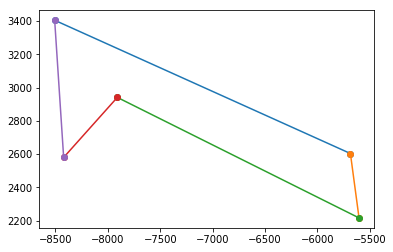

In [12]:
# Import matplotlib for plotting a scatter plot for coordinates
import matplotlib.pyplot as plt

# Extract the x and y coordinates of points p1 and p2
def extract_xy(p1, p2):
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    return (x,y)

# Plot each coordinate and draw lines between them in order
def plot_coords(coords, closed):
    for c in range(len(coords)-1):
        x, y = extract_xy(coords[c], coords[c+1])
        plt.plot(x, y, marker='o')
    
    # If the tour needs to be closed, plot a line between the last coordinate
    # and the first coordinate in coords
    if closed:
        x, y = extract_xy(coords[len(coords) - 1], coords[0])
        plt.plot(x, y, marker='o')
    
    # Display a tour of all five points
    plt.show()

plot_coords(first_five, True)

### Plot improved tour

An example improved tour could be from the points (zero-indexed):
0 --> 3 --> 1 --> 2 --> 4


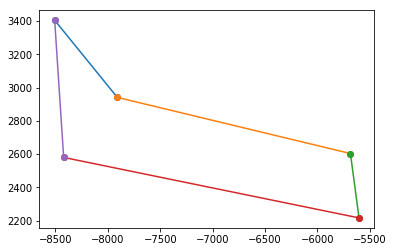

In [21]:
# Get the new coords in the improved order
new_tour = [0, 3, 1, 2, 4]
new_coords = [first_five[x] for x in new_tour]

# Plot the new tour
plot_coords(new_coords, True)

In [22]:
# Improved tour distance calculation
print(calculate_tour_sum(new_coords, True))

7071.844988727677


# Problem 5

### Tour of all cities

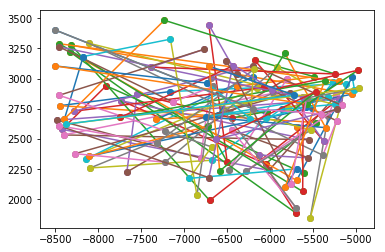

In [11]:
# Plot tour of all cities in given order
plot_coords(A, True)

### Tour of all cities sum

In [12]:
# Calculate the cost of the tour of all cities in given order
print(calculate_tour_sum(A, True))

172104.74952337498


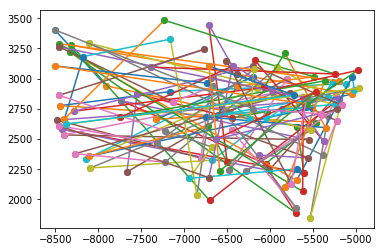

In [13]:
# To improve this tour simply replace the first five city coordinates with the improved order
# found in the last problem

# Make a copy of the city list
improved_A = list(A)
# Replace the first five cities order with the improved order
improved_A[:5] = new_coords

# Plot the improved tour
plot_coords(improved_A, True)

In [14]:
# Calculate tour cost of improved tour
print(calculate_tour_sum(improved_A, True))

171975.4627369517


# Problem 6

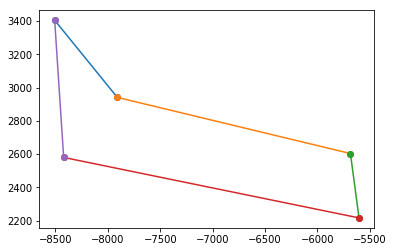

(array([-8507.06,  3404.24]), array([-7909.28,  2940.71]), array([-5685.17,  2603.52]), array([-5602.95,  2216.59]), array([-8421.26,  2580.03])) 7071.844988727677


In [15]:
# Import itertools to find all permutations of a list
import itertools

# This function takes a list of coordinates
# and calculates the minimal tour 
def brute_force_tsp(coords):
    all_perms = list(itertools.permutations(coords)) #Find all permutations of coords
    
    # Calculate the first tour sum and set as the minimum
    min_perm = calculate_tour_sum(all_perms[0], True) 
    min_tour = all_perms[0]
    
    # Find the minimum tour and sum
    for perm in all_perms[1:]:
        travel_cost = calculate_tour_sum(perm, True)
        if travel_cost < min_perm:
            min_perm = travel_cost
            min_tour = perm
    return (min_tour, min_perm)

min_tour, min_perm = brute_force_tsp(first_five)
plot_coords(min_tour, True)
print(min_tour, min_perm)

# Problem 7

To check how efficient a brute force method is for solving a TSP we will check it with n=8, 9, 10, 11 and show the time it takes to calculate each. With each additional city, the time complexity should increase by that much (eg. increasing from n=8 to n=9 should increase the time by 9 times as much as the time for 8!). This is due to the fact that the time complexity for the brute force tsp is O(n!) due to it having to calculate all permutations of n cities.

### With n=8

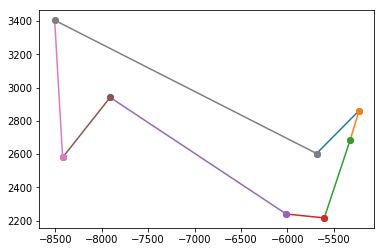

5646.545334493805
CPU times: user 831 ms, sys: 31.1 ms, total: 863 ms
Wall time: 753 ms


In [16]:
%%time
min_tour, min_perm = brute_force_tsp(A[:8])
plot_coords(min_tour, True)
print(min_perm)

### With n=9

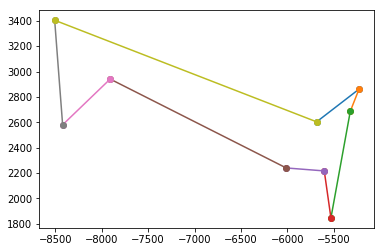

6248.728346427171
CPU times: user 4.91 s, sys: 51.9 ms, total: 4.96 s
Wall time: 5.01 s


In [91]:
%%time
min_tour, min_perm = brute_force_tsp(A[:9])
plot_coords(min_tour, True)
print(min_perm)

### With n=10

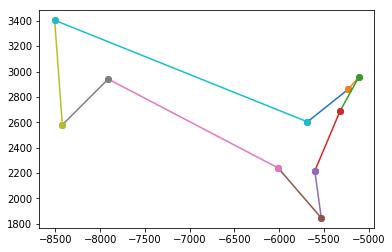

6442.653754301458
CPU times: user 58.2 s, sys: 927 ms, total: 59.1 s
Wall time: 1min 5s


In [92]:
%%time
min_tour, min_perm = brute_force_tsp(A[:10])
plot_coords(min_tour, True)
print(min_perm)

### With n=11

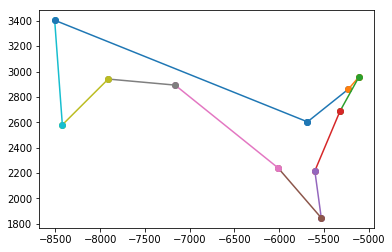

6491.366940306646
CPU times: user 11min 16s, sys: 9.08 s, total: 11min 25s
Wall time: 11min 58s


In [93]:
%%time
min_tour, min_perm = brute_force_tsp(A[:11])
plot_coords(min_tour, True)
print(min_perm)

# Problem 8

Now for the more interesting portion and the final answer for the band tour. I try to solve this TSP with two different solutions, one with a Genetic Algorithm and one with simply using Gurobi. 

### Solution of n=128 TSP with Genetic Algorithm

In [30]:
# Optimize over minimizing tour sum, so define fitness 
# as being the inverse of tour sum
def calc_fitness(route):
    return 1 / calculate_tour_sum(route, True)

In [31]:
import random as r
# Create initial population to iterate from

# Creates a random permutation from the city_list
def createRandomRoute(city_list):
    return r.sample(list(city_list), len(city_list))

# Generates a population of size pop_size from 
# createRandomRoute
def generateInitialPopulation(pop_size, city_list):
    initialPop = []
    for i in range(pop_size):
        initialPop.append(createRandomRoute(list(city_list)))
    return initialPop

In [32]:
import operator

# Rank all the routes by their fitness function
def rankRoutes(pop):
    fitnessResults = {}
    for i in range(len(pop)):
        fitnessResults[i] = calc_fitness(pop[i])
    return sorted(fitnessResults.items(), key = operator.itemgetter(1))

In [33]:
import pandas as pd
# Create the mating pool

# Utilizes the fitness proportion selection algorithm
# to select the parents for the next generation
# Utilizes "elitism" as well to choose first 'eliteSize'
# individuals to be in the mating pool automatically
def fp_selection(rankedPop, eliteSize):
    parents = []
    # Calculate the cumulative percentage of each route
    df = pd.DataFrame(np.array(rankedPop), columns = ['Tour', 'Fitness'])
    df['Fitness'] = pd.to_numeric(df['Fitness'])
    df['cumulative_sum'] = df.Fitness.cumsum()
    df['cumulative_perc'] = 100 * (df['Fitness'].cumsum() / df['Fitness'].sum())
    
    # Automatically places the top elites into the mating pool
    for i in range(eliteSize):
        parents.append(rankedPop[i][0])
        
    # Probabilstically chooses who else will be in the pool
    # relative to their cumulative percentage
    for j in range(eliteSize, len(rankedPop)):
        pick = 100 * r.random()
        if pick <= df.iat[i, 3]:
            parents.append(rankedPop[i][0])
    return parents

# Extracts the route from the route id
def extract_parent_routes(parents, population):
    return [population[i] for i in parents]

In [34]:
# Ordered Crossover breeding

# Checks whether a numpy array exists in a list of numpy arrays
def arreq_in_list(myarr, list_arrays):
    return next((True for elem in list_arrays if np.array_equal(elem, myarr)), False)

# Does a crossover breed on two parents p1 and p2
def breed(p1, p2):
    child = []
    
    # Randomly choose the genes from p1 to be carried over
    geneA = int(r.random() * len(p1))
    geneB = int(r.random() * len(p1))
    
    start = min(geneA, geneB)
    end = max(geneA, geneB)
    childp1 = [p1[i] for i in range(start, end)]
    
    # Choose genes from p2 that are not already carried over
    childp2 = [i for i in p2 if not arreq_in_list(i, childp1)]
    
    child = childp1 + childp2
    return child

# Breed the matingPool to create its children
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = r.sample(matingpool, len(matingpool))
    
    # Keep elites in the next generation
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    # Breed members of the mating pool
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [35]:
# Mutate population with swap mutation

# Given an individual and some predefined mutationRate, 
# mutate the individual with probablity of mutationRate
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(r.random() < mutationRate):
            swapWith = int(r.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

# Run the mutation on the entire population
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [36]:
# Repeat and construct genetic algorithm

# Run through the entire genetic algorithm process
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = fp_selection(popRanked, eliteSize)
    matingpool = extract_parent_routes(selectionResults, currentGen)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

# Define genetic algorithm
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = generateInitialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

Due to a Genetic Algorithm being a stochastic optimization problem, finding the ideal parameters will be difficult for this problem. A possible and well-used solution for this is configuring this for use in the GridSearchCV in scikit-learn to try different parameters, but I have not been able to do this due to time constraints on this assignment.

In [56]:
# I could probably make this work with gridSearchCV or something, but I don't have time right now
geneticAlgorithm(population=list(A), popSize=2000, eliteSize=100, mutationRate=0.1, generations=10000)

Initial distance: 202576.66886167377
Final distance: 191446.6700428277


[array([-8405.49,  2533.72]),
 array([-6129.46,  2367.2 ]),
 array([-5041.91,  3013.26]),
 array([-6729.21,  2962.82]),
 array([-5523.51,  2575.2 ]),
 array([-8459.28,  3264.08]),
 array([-7730.4 ,  2816.22]),
 array([-5618.84,  2065.25]),
 array([-5468.21,  2891.63]),
 array([-7667.55,  2226.26]),
 array([-7159.69,  3326.96]),
 array([-6709.88,  3102.4 ]),
 array([-8270.73,  2378.25]),
 array([-6850.92,  2032.79]),
 array([-6702.97,  1990.63]),
 array([-8479.42,  2656.02]),
 array([-6050.69,  2294.65]),
 array([-6477.72,  2246.28]),
 array([-6626.97,  2498.48]),
 array([-5195.2 ,  2832.23]),
 array([-8394.41,  2666.4 ]),
 array([-5109.61,  2958.66]),
 array([-6506.72,  3148.67]),
 array([-5865.51,  2752.08]),
 array([-5245.72,  3038.81]),
 array([-5531.11,  1846.22]),
 array([-5228.45,  2861.23]),
 array([-6441.79,  2674.67]),
 array([-6202.7 ,  3014.64]),
 array([-6712.64,  3446.49]),
 array([-6445.93,  2571.74]),
 array([-5696.92,  1931.22]),
 array([-5362.51,  2982.15]),
 array([-6

### Solution with Gurobi

In [2]:
from gurobipy import *

In [18]:
# Create variables

m = Model()
data = A
n = len(data)

def subtourElim(model, where):
    if where == GRB.callback.MIPSOL:
        selected = []
        # make a list of edges selected in the solution
        for i in range(n):
            sol = model.cbGetSolution([model._vars[i,j] for j in range(n)])
            selected += [(i,j) for j in range(n) if sol[j] > 0.5]
        # find the shortest cycle in the selected edge list
        tour = subtour(selected)
        if len(tour) < n:
            # add a subtour elimination constraint
            expr = 0
            for i in range(len(tour)):
                for j in range(i+1, len(tour)):
                    expr += model._vars[tour[i], tour[j]]
            model.cbLazy(expr <= len(tour)-1)

# Given a tuplelist of edges, find the shortest subtour
def shortestSubtour(edges):
    # Make an array to check whether an edge yet 
    visited = [False]*n
    # Array to store the subtours
    cycles = []
    # Array to store lengths of subtours
    lengths = []
    # Make an list of empty lists to store the edges and their neighbors
    selected = [[] for i in range(n)]
    # Store the neighbors for each edge
    for x,y in edges:
        selected[x].append(y)
    while True:
        # Check the next "False" edge that has not been visited
        current = visited.index(False)
        thiscycle = [current]
        # Check through all the neighbors of this edge
        while True:
            # Set edge as being visited
            visited[current] = True
            # Check neighbors of the current edge that have not been visited
            neighbors = [x for x in selected[current] if not visited[x]]
            # if no neighbors leave
            if len(neighbors) == 0:
                break
            # Set the next neighbor as the current edge
            current = neighbors[0]
            thiscycle.append(current)
        # Add the "current" edge to the cycles 
        cycles.append(thiscycle)
        lengths.append(len(thiscycle))
        if sum(lengths) == n:
            break
    return cycles[lengths.index(min(lengths))]

# Create variables for the model
vars = {}
for i in range(n):
    for j in range(i+1):
        vars[i, j] = m.addVar(obj = distance(data[i], data[j]), vtype=GRB.BINARY,
                             name='e'+str(i)+'_'+str(j))
        vars[j, i] = vars[i, j]
    m.update()

# Add the constraint that a city can only be visited once
# and that no cycles are allowed
for i in range(n):
    m.addConstr(quicksum(vars[i,j] for j in range(n)) == 2)
    vars[i,i].ub = 0

m.update()

# Optimize Model
m._vars = vars
m.params.LazyConstraints = 1
m.optimize(subtourElim)

solution = m.getAttr('x', vars)
selected = [(i,j) for i in range(n) for j in range(n) if solution[i,j] > 0.5]
tour = shortestSubtour(selected)
assert len(tour) == n

# Extracts the city from the city id
def extract_city(cityid, city):
    return [city[i] for i in cityid]

print('')
print('Optimal tour: %s' % extract_city(tour, data))
print('Optimal cost: %g' % m.objVal)
print('')
print(len(extract_city(tour, data)))

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 128 rows, 8256 columns and 16384 nonzeros
Variable types: 0 continuous, 8256 integer (8256 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve removed 0 rows and 128 columns
Presolve time: 0.01s
Presolved: 128 rows, 8128 columns, 16256 nonzeros
Variable types: 0 continuous, 8128 integer (8128 binary)

Root relaxation: objective 1.680489e+04, 210 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16804.8941    0   32          - 16804.8941      -     -    0s
     0     0 16898.1628    0   12          - 16898.1628      -     -    0s
     0     0 16911.6153    0   25          - 16911.6153      -     -    0s
     0     0 169

Based on the data currently available to me, the optimal tour to minimize the total distance of the tour is given by the city list above. 

For example the first city the band should visit is the coordinates of [-8507.06,  3404.24], the next city is coordinates of [-8313.57,  3276.5 ], etc.

Visiting each of these cities in the order present will give the band the optimal tour of all the cities while minimizing the total distance traveled. By minimizing the distance traveled the band can not only shorten the cost of travel, but also have more time for other activities such as sightseeing, meeting with fans, etc. which will greatly help the band's recognition and public image.

# Problem 9

The skeletal code for creating this Gurobi optimization was provided by Nico Courts in his Intermediate-Optimization notebook which can be found here https://github.com/NicoCourts/381-Programming. 

## Identifying real-world problem

The Chicago Northeast Tollway wishes to minimize the number of toll booth collectors hired for a given period of time (eg.12am to 6am), while fulfilling the staffing demands that are required per period of time and meeting the work schedule constraints for each toll-booth operator.

## Mathematical model

### Goal

The Chicago Northeast Tollway wishes to minimize the number of toll both operators hired.

### Assumptions

- Toll booth operators are equal in ability, pay, and are consistent in the hours worked and hours they are on break. 
- No backup toll booth operators need be hired. 
- Toll plaza staffing demands will not change drastically in the forseeable future and we do not have to take into account special days such as holidays, festivals, etc.
- Toll plaza will continue to operate on a 24 hour basis. 

### Model

Let $x_i$ be the number of employees beginning work at hour $i=(0,1,2, ... 23)$ where i=0 represents 12am and i=23 represents 11pm. 

Since the goal is to minimize the number of toll both operators to be hired we set the objective function to be

$ min$ $z = \sum_{i=0}^{23} x_i$

This goal is subject to the constraints that each employee work for 4 hours, have 1 hour of break, and work for 4 more hours. In addition for each period of time there are a certain number of collectors needed that is given by the following table:

| Hours | Collectors Needed |
|---|---|
| 12-6 a.m. | 2 |
| 6-10 a.m. | 8 |
| 10 a.m. to noon | 4 |
| noon to 4 p.m. | 3 |
| 4-6 p.m. | 6 |
| 6-10 p.m. | 5 |
| 10 p.m. to midnight | 3 |

Mathematically this can be expressed by:

(0 to 1 constraint) $x_{16} + x_{17} + x_{18} + x_{19} + x_{21} + x_{22} + x_{23} + x_{0} >= 2$ <br>
(1 to 2 constraint) $x_{17} + x_{18} + x_{19} + x_{20} + x_{22} + x_{23} + x_{0} + x_{1} >= 2$ <br>
(2 to 3 constraint) $x_{18} + x_{19} + x_{20} + x_{21} + x_{23} + x_{0} + x_{1} + x_{2} >= 2$ <br>
(3 to 4 constraint) $x_{19} + x_{20} + x_{21} + x_{22} + x_{0} + x_{1} + x_{2} + x_{3} >= 2$ <br>
(4 to 5 constraint) $x_{20} + x_{21} + x_{22} + x_{23} + x_{1} + x_{2} + x_{3} + x_{4} >= 2$ <br>
(5 to 6 constraint) $x_{21} + x_{22} + x_{23} + x_{0} + x_{2} + x_{3} + x_{4} + x_{5} >= 2$ <br>
(6 to 7 constraint) $x_{22} + x_{23} + x_{0} + x_{1} + x_{3} + x_{4} + x_{5} + x_{6} >= 8$ <br>
(7 to 8 constraint) $x_{23} + x_{0} + x_{1} + x_{2} + x_{4} + x_{5} + x_{6} + x_{7} >= 8$ <br>
(8 to 9 constraint) $x_{0} + x_{1} + x_{2} + x_{3} + x_{5} + x_{6} + x_{7} + x_{8} >= 8$ <br>
(9 to 10 constraint) $x_{1} + x_{2} + x_{3} + x_{4} + x_{6} + x_{7} + x_{8} + x_{9} >= 8$ <br>
(10 to 11 constraint) $x_{2} + x_{3} + x_{4} + x_{5} + x_{7} + x_{8} + x_{9} + x_{10} >= 8$ <br>
(11 to 12 constraint) $x_{3} + x_{4} + x_{5} + x_{6} + x_{8} + x_{9} + x_{10} + x_{11} >= 8$ <br>
(12 to 13 constraint) $x_{4} + x_{5} + x_{6} + x_{7} + x_{9} + x_{10} + x_{11} + x_{12} >= 3$ <br>
(13 to 14 constraint) $x_{5} + x_{6} + x_{7} + x_{8} + x_{10} + x_{11} + x_{12} + x_{13} >= 3$ <br>
(14 to 15 constraint) $x_{6} + x_{7} + x_{8} + x_{9} + x_{11} + x_{12} + x_{13} + x_{14} >= 3$ <br>
(15 to 16 constraint) $x_{7} + x_{8} + x_{9} + x_{10} + x_{12} + x_{13} + x_{14} + x_{15} >= 3$ <br>
(16 to 17 constraint) $x_{8} + x_{9} + x_{10} + x_{11} + x_{13} + x_{14} + x_{15} + x_{16} >= 3$ <br>
(17 to 18 constraint) $x_{9} + x_{10} + x_{11} + x_{12} + x_{14} + x_{15} + x_{16} + x_{17} >= 6$ <br>
(18 to 19 constraint) $x_{10} + x_{11} + x_{12} + x_{13} + x_{15} + x_{16} + x_{17} + x_{18} >= 6$ <br>
(19 to 20 constraint) $x_{11} + x_{12} + x_{13} + x_{14} + x_{16} + x_{17} + x_{18} + x_{19} >= 5$ <br>
(20 to 21 constraint) $x_{12} + x_{13} + x_{14} + x_{15} + x_{17} + x_{18} + x_{19} + x_{20} >= 5$ <br>
(21 to 22 constraint) $x_{13} + x_{14} + x_{15} + x_{16} + x_{18} + x_{19} + x_{20} + x_{21} >= 5$ <br>
(22 to 23 constraint) $x_{14} + x_{15} + x_{16} + x_{17} + x_{19} + x_{20} + x_{21} + x_{22} >= 3$ <br>
(23 to 0 constraint) $x_{15} + x_{16} + x_{17} + x_{18} + x_{20} + x_{21} + x_{22} + x_{23} >= 3$ <br>

## Mathematical/Programming Solution

In [24]:
from gurobipy import *
import matplotlib.pyplot as pyplot

m = Model()

Academic license - for non-commercial use only


In [34]:
# We will use the convention that 
#     0  =>  midnight
#     1  =>  1 a.m.
#     ...
#     12 =>  noon
#     ...
#     23 =>  11 p.m.

# Setting this as a variable at the beginning makes it easier to change later if we want
# to use a different number of possible starting times
hours = range(24)

# A function that returns the employees needed for a given hour.
# Also good practice in using if/elif/else! :)
def need(x):
    if x in range(0, 6):
        return 2
    elif x in range(6, 10):
        return 8
    elif x in range(10, 12):
        return 4
    elif x in range(12, 16):
        return 3
    elif x in range(16, 18):
        return 6
    elif x in range(18, 22):
        return 5
    elif x in range(22, 24):
        return 3
    else:
        return "Invalid hour"

# This creates a dictionary that contains the number of employees we need at any given time
needed = {}
for x in hours:
    needed[x] = need(x)

# Usage: (number of employees needed at 2pm)
print(need(14))
# Usage: Pretty printing
print("At hour %d we will need %d people on-staff." % (14, need(x)))

3
At hour 14 we will need 3 people on-staff.


In [35]:
# This array will be useful in setting up our constraints. 
# The (i,j)th entry is 0 or 1 depending on whether or not an employee
# who started at hour i is still on-duty during hour j.

# This function computes whether someone who started at i is around at j.
def isAround(i,j): 
    # get list of all employees working who start in these hours
    hoursplus = list(hours) + list(hours)
    employeesWorking = hoursplus[j + 16: j + 25]
    employeeOnBreak = employeesWorking.pop(4)
    if i in employeesWorking:
        return 1
    else:
        return 0

In [36]:
# An array of dictionaries
# onDuty[j] is a dictionary telling us whether i is working at hour j.
# [{0: 1 1 ,1 ...}, {}]
### I don't understand how this is formulated
onDuty = []
for j in hours:
    d = {}
    for i in hours:
        d[i] = isAround(i, j)
    onDuty.append(d)

In [37]:
# Usage: Is someone who started at 2am around at 7am?
print(onDuty[7][2])

1


In [38]:
# Print it out so you can see 
for i in hours:
    print([onDuty[j][i] for j in hours])
sum(onDuty[0].values())

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

8

---
#### Adding Variables
Now that we have our data we want to add our (twenty-four) variables programmatically. Here's how we do that:

In [39]:
employeesAtI = m.addVars(hours, vtype=GRB.INTEGER, name='e')
employeesAtI

{0: <gurobi.Var *Awaiting Model Update*>,
 1: <gurobi.Var *Awaiting Model Update*>,
 2: <gurobi.Var *Awaiting Model Update*>,
 3: <gurobi.Var *Awaiting Model Update*>,
 4: <gurobi.Var *Awaiting Model Update*>,
 5: <gurobi.Var *Awaiting Model Update*>,
 6: <gurobi.Var *Awaiting Model Update*>,
 7: <gurobi.Var *Awaiting Model Update*>,
 8: <gurobi.Var *Awaiting Model Update*>,
 9: <gurobi.Var *Awaiting Model Update*>,
 10: <gurobi.Var *Awaiting Model Update*>,
 11: <gurobi.Var *Awaiting Model Update*>,
 12: <gurobi.Var *Awaiting Model Update*>,
 13: <gurobi.Var *Awaiting Model Update*>,
 14: <gurobi.Var *Awaiting Model Update*>,
 15: <gurobi.Var *Awaiting Model Update*>,
 16: <gurobi.Var *Awaiting Model Update*>,
 17: <gurobi.Var *Awaiting Model Update*>,
 18: <gurobi.Var *Awaiting Model Update*>,
 19: <gurobi.Var *Awaiting Model Update*>,
 20: <gurobi.Var *Awaiting Model Update*>,
 21: <gurobi.Var *Awaiting Model Update*>,
 22: <gurobi.Var *Awaiting Model Update*>,
 23: <gurobi.Var *Awa

---
#### Setting constraints
Then we have to set our constraints -- we want to ensure that each of the hours is amply-staffed.

In [40]:
# Add constraints
for i in hours:
    employeesVar = [employeesAtI[j[0]] for j in onDuty[i].items() if j[1] == 1]
    m.addConstr(sum(employeesVar) >= need(i))
# for i in hours:
#     for j in onDuty[i].items():
#         print(j)

# Update model
m.update()

---
#### Set the objective and run!

In [41]:
# Set the objective
m.setObjective(sum(employeesAtI), GRB.MINIMIZE)
# Run!
m.optimize()

Optimize a model with 48 rows, 48 columns and 384 nonzeros
Variable types: 0 continuous, 48 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 8e+00]

MIP start produced solution with objective 276 (0.01s)
Loaded MIP start with objective 276


Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 276 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.760000000000e+02, best bound 2.760000000000e+02, gap 0.0000%


Optimal Solution Found!

We need 276 employees in total.

Hour:	 Employees Needed:
0	 3
1	 4
2	 3
3	 1
4	 0
5	 0
6	 0
7	 0
8	 0
9	 0
10	 0
11	 3
12	 0
13	 2
14	 0
15	 3
16	 0
17	 0
18	 0
19	 0
20	 0
21	 0
22	 0
23	 0


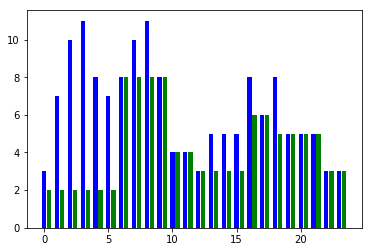

In [42]:
# It's a good practice to check whether the solution is an optimal one
if m.status == GRB.Status.OPTIMAL:
    print('Optimal Solution Found!\n')
    # Gets the final values from our variables
    solution = m.getAttr('x', employeesAtI)
    
    # This value should be minimized
    print('We need %d employees in total.\n' % m.getAttr('ObjVal'))
        
    # Print our solution
    print('Hour:\t Employees Needed:')
    for h in hours:
        print('%d\t %d' % (h, solution[h]))
    
    # Create a bar chart to demonstrate we have satisfied our constraints
    
    # Y-values
    data = [0 for h in hours]
    for h in hours:
        for j in hours:
            if onDuty[h][j]:
                data[h] += solution[j]
    neededList = [needed[i] for i in hours]
    
    # X-values
    x1 = range(len(data))
    x2 = [i+0.4 for i in x1]
    
    # Width of bar
    w = 1/3
    # Tell the plotter we want to add several graphs to the same plot
    ax = pyplot.subplot(111)
    ax.bar(x1, data,width=w,color='b',align='center')
    ax.bar(x2, neededList,width=w,color='g',align='center')
    
    #Plot!
    pyplot.show()
else:
    print("No optimal solution found!")


## Real World Interpretation

Based on the current data and assumptions made for this problem, I recommend that Chicago Northeast Tollway hire 3 toll booth operators to begin, 4 toll booth operators to begin at 1 am, 3 toll booth operators to begin at 2 am, 1 toll booth operator to begin at 3 am, 3 toll booth operators to begin at 11 am, 2 toll booth operators to begin at 1 pm, 3 toll booth operator to begin at 3 pm. See report for further details.